In this interactive example, we will show you how to code up a simple integration scheme, starting in 1D and then expanding to 2D. We will various aspects of numerical integrators, but in particular how altering the timestep can affect the accuracy of a simulation - an extremely important consideration in DEM, as the wrong value can make our models unphysical!

The examples are coded in Python, which is one of the more user-friendly programming languages, but can still be a bit daunting for those who have never coded before. If this is you, please remember that **it is not necessary to fully understand each line of code** - just the general gist of what we are trying to do in each individual "code block".

We begin by importing the necessary "libraries" (lists of built-in functions belonging to a given programming language) to 1) do the maths needed and 2) plot our results:

In [18]:
# Importing the relevant libraries
import numpy as np # Useful mathematical functions
import matplotlib.pyplot as plt # Useful plotting functions

In the below code, we define the relevant properties of a particle and the system in which it exists. For simplicity, let us assume for the moment that the particle is pointlike, and consider only a particle initially at rest (v = 0) and which is exposed to no forces other than gravity.

In [19]:
z = 1 # defining an initial height from which the particle will be dropped. Default set as 1 m

v = 0 # Defining an initial velocity of zero (particle is at rest when dropped)

g = -9.81 # Defining the gravitational acceleration in m/s^2; negative to indicate gravity pointing "down"

Having set up the physical system itself, we now need to define some properties for the simulation - notably how long we want it to run for, and what time step we would like to use.

In [20]:
t_max = 2 # The total length of time (in seconds) we wish to simulate

t = 0 # setting the initial, starting time as zero

dt = 0.05 # Setting the timestep

# Defining a pair of arrays to save data at every timestep
t_array = np.array([t])
z_array = np.array([z])

Finally, having set up all our parameters, we can now create and run our simulation. The below code repeats all the steps within the while loop (i.e. all the indented lines) until the condition "t = t_max" is reached - i.e. we have reached the chosen end point of our simulation.

In the present case, we simply have a particle falling under gravity - perhaps not the most enlightening simulation, but a good way to see the Euler method in action.

Text(0, 0.5, 'z (m)')

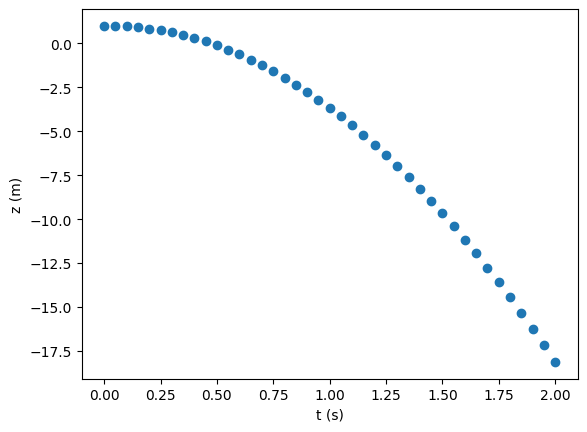

In [21]:
# Looping until the end condition is reached
while t < t_max :
  
  # Applying the Euler method, as outlined in the main text
  z = z + v * dt # Updating position

  v = v + g * dt # updating velocity

  # Moving on to the next timestep
  t = t + dt

  # Adding new data to relevant arrays
  t_array = np.append(t_array,t)
  z_array = np.append(z_array,z)

# Plotting the data produced
plt.scatter(t_array,z_array)
plt.xlabel('t (s)')
plt.ylabel('z (m)')
  

Note that the above has been coded in a rather inefficient manner so as to demonstrate as simply as possible the basic principle of DEM!

**Question**: How might you check if the simulation has performed correctly?

Next, let's try "launching" our projectile with an initial velocity and seeing how far it travels.

Text(0, 0.5, 'z (m)')

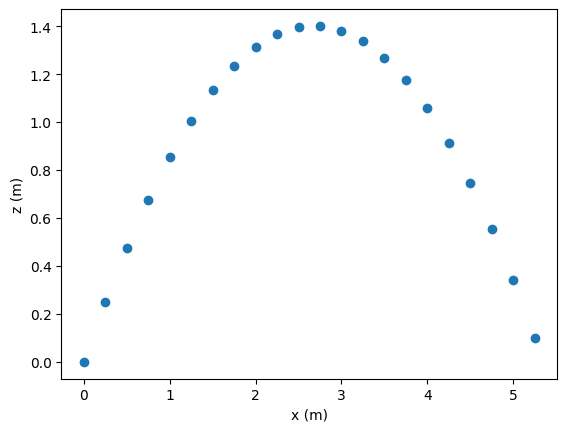

In [24]:
# Setting a new timestep for this code block (if desired)
dt = 0.05

# Resetting the 'particle' to an initial position at z = 0
t = 0
z = 0

# Now, also including a horizontal position and splitting velocity into 
# two components to make the problem two-dimensional
x = 0
vx = 5 # Setting velocity in the x-direction to an arbitrary 5 m/s
vz = 5 # Setting vz = vx (i.e. our projectile is launched at 45 degrees)

# Resetting original arrays and creating new array to store horizontal motion
t_array = np.array([t])

z_array = np.array([z])

x_array = np.array([x])

while t < t_max :
  
  z = z + vz * dt 
  x = x + vx * dt  # Updating horizontal motion in the same way as vertical

  # Stopping the code when the projectile reaches the "floor"
  if z <= 0:
    break

  vz = vz + g * dt 
  # Note that there is no need to update vx - why? What are we assuming?

  t = t + dt

  t_array = np.append(t_array,t)
  z_array = np.append(z_array,z)
  x_array = np.append(x_array,x)

plt.scatter(x_array,z_array)
plt.xlabel('x (m)')
plt.ylabel('z (m)')

Some questions to consider:

Try adjusting the timestep used. What happens to the total distance travelled as dt increases? Why might this be? 

What happens to the time required to run the simulation as dt decreases? Why is this the case? 

What can we learn from the above in the context of DEM simulation?

As mentioned in the main text, some of the issues of the Euler method - notably its non-conservative nature which we have illustrated above - can be alleviated by using another integrator. One widely-used algorithm is the _Velocity-Verlet_ integrator, which can be summarised as follows:


1. The particle's velocity is integrated by **half a timestep** using the 'old' acceleration at timestep $n$: 

    ${v}_{n+\frac{1}{2}} = {v}_n + {a}_n \frac{dt}{2}$

2. The particle's position is integrated by a **full timestep** using the 'mid-point' velocity: 
    
    $r_{n+1} = r_n + v_{n+\frac{1}{2}}dt$

3. The particle's velocity is integrated by **another half-timestep** using the 'new' acceleration at timestep $n+1$: 

    $v_{n+1} = v_{n+\frac{1}{2}} + a_{n+1} \frac{dt}{2}$ 
    
In the code below we directly compare trajectories calculated using Euler and Velocity-Verlet: 

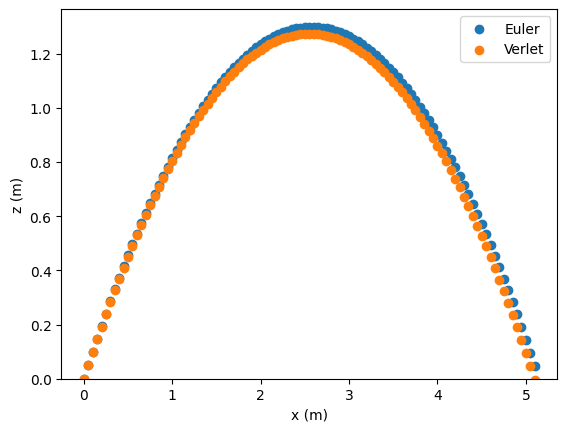

In [28]:
# Shared timestep for both simulations
dt = 0.01

# Setting up initial conditions for both Verlet and Euler algorithms
t = 0 # Note both will use the same timestep to allow meaningful comparison!

z_euler = 0
x_euler = 0
vx_euler = 5 # Setting velocity in the x-direction to an arbitrary 5 m/s
vz_euler = 5 # Setting vz = vx (i.e. our projectile is launched at 45 degrees)

z_verlet = 0
x_verlet = 0
vx_verlet = 5 
vz_verlet = 5 


# Resetting original arrays and creating new array to store horizontal motion
t_array = np.array([t])

z_array_euler = np.array([z_euler])
x_array_euler = np.array([x_euler])

z_array_verlet = np.array([z_verlet])
x_array_verlet = np.array([x_verlet])

while t < t_max :
  
  # Euler method
  z_euler = z_euler + vz_euler * dt 
  x_euler = x_euler + vx_euler * dt  # Updating horizontal motion in the same way as vertical

  vz_euler = vz_euler + g * dt 
  
  # Verlet method
  vz_verlet = vz_verlet + g * dt / 2 # updating velocity by half a time steo

  z_verlet = z_verlet + vz_verlet * dt # updating position based on midpoint velocity
  x_verlet = x_verlet + vx_verlet * dt 

  vz_verlet = vz_verlet + g * dt / 2 # updating velocity by a second half timestep

  t = t + dt

  # Stopping the code when the projectile reaches the "floor" for both cases
  if z_euler <= 0 and z_verlet <= 0:
    break

  t_array = np.append(t_array,t)
  
  z_array_euler = np.append(z_array_euler,z_euler)
  x_array_euler = np.append(x_array_euler,x_euler)

  z_array_verlet = np.append(z_array_verlet,z_verlet)
  x_array_verlet = np.append(x_array_verlet,x_verlet)

plt.scatter(x_array_euler,z_array_euler)
plt.scatter(x_array_verlet,z_array_verlet)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.gca().set_ylim(bottom=0)
plt.legend(["Euler", "Verlet"], loc ="upper right")

As previously, try adjusting the timestep used, focusing in particular on larger (t >= 0.01) values. Does the total distance travelled by the Verlet-integrated projectile vary in the same manner as the Euler case? Why/why not?